# Extra Material - Diffusion of Innovations

## Learning goals:

- Understand the similarities and dissimilarities between natural selection and cultural evolution
- Study the spread of innovations through more complex models of evolution, specifically through diffusion
- Familiarize with the methods used to model the spread of agriculture from the Middle East to Europe

Innovations spread between people much in the same way as genetic mutations replicate through generations of organisms and diseases transmit from one individual to another. Because of this similarity, we may use similar numerical techniques to model evolution of innovations as for the modelling of evolution by natural selection. In this context we use the term "innovation" to describe ideas or information, such as the evolution of language, the expansion of religions and the spread of a rumor. 

However, in order to model the spread of innovations in the same way as evolution by natural selection, some simplifying assumptions must be made. These assumptions are (Cavalli-Sforza, Feldman):

1. Acceptance of an innovation is a one-step process
2. The probability of adoption depends on the number of individuals who have already adopted the innovation, and the number that have not yet adopted it
3. Transmission is exclusively related to observation or contact with people who have already adopted the innovation
4. Every individual adopt the innovation equally 
5. Each individual has equal chance of eventually contacting every other individual

Following these assumptions essentially means that we neglect important properties of human beings, such as the fact that some people are more susceptible to new innovations than others, and that individuals typically need time to fully adopt an innovation they have become aware of. A more thorough discussion concerning these assumptions and their weaknesses can be found in the ([*introductory chapter*](https://uio.instructure.com/courses/33071/files/1451416)) of "Cultural Transmission and Evolution" by Cavalli-Sforza and Feldman. 

## Spreading a Rumor

Let us use the spread of a rumor as an example of an innovation that, under some simplifying restrictions, follow the same model as the spread of an infectuous disease or a mutated gene in a population. 

We start by defining a population consisting of $P=100$ people. Further assume that only one person possesses (and thus starts) the rumor at some initial time $t=t_0=0$, which we set as the first day of the spread of the rumor. 

As in the case of the spreading of an infectious disease, this one person can – in theory – tell all the $99$ other individuals in the group about the rumor already the first day. However, the likeliness of this person being able to meet every other person in the population during this time, let alone the probability that all of the receivers of the rumor will continue to spread it, calls for some constant that adjusts the number of pairs of people transmitting the rumor and people recieving it to a smaller number. In similarity with the spread of disease, we may write the number of possible pairs of transmittors, $T(t)$, and receivers, $R(t)$, of the rumor at a given time, $t$, as 

\\[ \alpha T(t) R(t),\\]

where $\alpha$ (pronounced "alpha") denotes the factor that dampens the possibility for each of the transmittors to tell the rumor to all of the receivers at a given time instance. We set $\alpha = 0.02$. Initializing everything we know so far in a code, thus yields  

In [1]:
# Initializing
t_0   = 0         # First day of spreading the rumor
T_0   = 1         # Number of people who possess the rumor on the first day
P     = 100       # Total number of people in the population

alpha = 0.02      # Rate of adoption of the innovation

We further assume that the rumor spreads over such a short time interval that the total number of people in the population, $P$, is constant. Then the number of possible receivers of the rumor must decrease as the number of possible transmitters increase. Therefore we must have that 

\\[ R(t) = P - T(t).\\]

Now we define a function `spread_between_people` which takes $\alpha$, $T(t)$ and $P$ as arguments, and returns the product $\alpha T(t) R(t)$. As we will see shortly, the time dependence in the variables will be dealt with in another part of the code, so it is not included in the function. We thus write

In [2]:
def spread_between_people(alpha, P, T):
    return alpha*T*(P - T)

Setting the range of the simulation to five days, and choosing the number of time steps to be ten times the number of days, we may also construct a time array and an array to save the number of transmitters at each time step. 

In [3]:
# Time in days
time = 5             # Number of days
N    = int(10*time)  # Number of time steps 
dt   = time/N        # Time step

# Making arrays 
import numpy as np
t = np.linspace(t_0, time, N) # Time array
T = np.zeros(N)               # Array of possible transmitters (people who have heard the rumor)

T[0] = T_0

By the same reasoning as for the change in infected people during each time step, we write the change in transmitters as a function of time as 

\\[
\text{Number of transmitters at time }(t + \Delta t) = \text{Number of transmitters at time }t + \text{Number of new transmitters during }\Delta t,
\\]

which is the same as writing 

\\[
T(t + \Delta t) = T(t) + \alpha T(t)R(t)\Delta t.
\\]

Using that $R(t) = P - T(t)$, we can further write 

\\[
T(t + \Delta t) = T(t) + \alpha T(t)(P - T(t))\Delta t. 
\\]

Looping over each time we thus find that 

In [4]:
for i in range(N-1): # Looping over time
    T_new  = spread_between_people(alpha, P, T[i])
    
    T[i+1] = T[i] + T_new*dt

Finally we gather the obtained information about the number of people possessing the rumor (transmitters) as a function of time, in a plot: 

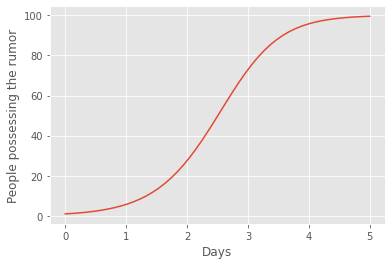

In [5]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") # Function that makes the plot look nice. Not necessary for plotting.        
plt.plot(t, T)
plt.xlabel("Days")
plt.ylabel("People possessing the rumor")
plt.show()

After approximately five days, all the people in the little community have received the rumor. We see that the spread of the rumors follows the exact same *S*-shaped graph as the spread of an infectious disease. 

---

### In-class exercises:

1. Try different values of $\alpha$ in the code above. What happens if you set $\alpha = 0$, $\alpha = 0.05$ and $\alpha = 1$? Explain your observations. 

2. What happens if you change the number of time steps in the code above to 100 times the number of simulation days instead? Run the code with this new number of time steps for both $\alpha = 0.05$ and $\alpha = 1$, and explain what you observe.

---

## Spread of Early Farming 

In our models so far, the groups of people under consideration have been confined to a small area of movement. Hence, the spread of innovations have been restricted to the same geographic area. We will now study the consequences of removing this restriction, thus letting the innovation expand across geographical bounds. 

To model this effect we need to make use of a method called *diffusion*. Diffusion is the process of spreading something more widely. Typically it is used to describe the net movement of some substance from a region where it is higher consentrated to a region where its consentration is lower. To illustrate the concept of diffusion of innovations, we will use the spread of early farming from The Middle East to Europe described in Cavalli-Sforza and Feldman. 

### Diffusion in one variable

According to Ammerman and Cavalli-Sforza ([*Ammerman, Cavalli-Sforza, 1971*](https://www.jstor.org/stable/2799190)) the city of Jericho serves as the most probable center for the migration of early farming, which started around 8,845 B.P. We will model people's movement from the Middle East to Europe, aiming to obtain a better idea of how agriculture may have spread between peoples. In the model below, we will confine the spread of early farming to movements in one dimension only. This is called diffusion in one variable, or one-dimensional diffusion. 

#### Initial distribution of farmers

Assume that the population of early farmers in Jericho lived around the center of the city, denoted by $x_0=0$. Further assume that most farmers lived close to this center and that the number of farmers to the east and to the west of the center decreased exponentially out from it. Then the density of people who had adopted the idea of agriculture, $p$, should be given by a gaussian distribution. Such a distribution is largest at the center, and decreases exponentially to the sides. 

Mathematically, the gaussian distribution is described as an exponential function of the form 

\\[ 
e^{-\frac{\left(x - x_0\right)^2}{2\sigma^2}},
\\]

where $x$ is the variable that changes – in our case the position of the farmers, $x_0$ is the center of the distribution, often called the mean, which in our case is located at $x_0=0$ and the variable $\sigma$ (pronounced "sigma") is an estimate of half of the width of the distribution. In our case, $\sigma$ quantifies how far from the center, in one direction, most of the population of farmers lived. Numerically, we define the gaussian function as

In [6]:
def gaussian(x, mean, sigma):
    return np.exp(-0.5*((x-mean)/sigma)**2)

From the article by Ammerman and Cavalli-Sforza we find that signs of agriculture traced back to the movement of farmers from the Middle East to Europe, have been found as far as 4333 km away from the expected source of migration in Jericho. Measuring all distances in 1000 km from Jericho, we set the maximal distance of movement in our simulations to $d = 4.333$. In these units, the area of Jericho is about $A = 5.8\cdot 10^{-5}$. Assuming that the city is approximately squared, this means that its confining lengths, $L$, are given by the squareroot of this area, so $L = \sqrt{A}$. The quantity $\sigma$ is given by the fraction of the length of Jericho to the whole distance over which the idea of agriculture eventually have spread. In other words,
\\[
\sigma = \frac{L}{d}.
\\]
Below, the initial distibution of the concentration of people around the center of Jericho is computed.

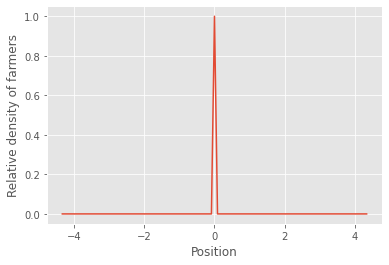

In [7]:
import numpy as np

x_0   = 0               # Position of center (Jericho)
A     = 58              # Area of Jericho in km^2
L     = np.sqrt(A)/1000 # Length of Jericho per 1000 km.
d     = 4.333           # Total distance from Jericho per 1000 km.
sigma = L/d             # Initially, most of the farmers live inside Jericho

"""Making an array of positions around the center at x_0=0 (Jericho).""" 
Nx = 100                                 # Number of points in position array
x  = np.linspace(x_0-d, x_0+d, Nx+1)     # Array of positions centered around x_0

"""Initial distribution of farmers around Jericho"""
p_init = gaussian(x, x_0, sigma)

#Plotting
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(x, p_init)
plt.xlabel("Position")
plt.ylabel("Relative density of farmers")
plt.show()

The values on the y-axis in the plot above shows the density of farmers relative to the density at the center. This is why the peak of the distribution takes the value $1$, whereas the the density of farmers at $x=L/d$ (i.e. one $\sigma$ away from the center) is $0.6$ of the density at the center. This means that the density of farmers situated at $x = L/d$ was initially the same as $60 \%$ of the density of farmers who lived at the center of the city.  

#### Migration of farmers

For different reasons, likely being either overpopulation or worsening farming conditions, parts of the population of Jericho started to move out from the city of Jericho. Since we restrict our model to one dimension, we may therefore assume that some of the inhabitants chose to migrate to the west of the city, whereas others chose to migrate to the east. Others, again, continued to stay in Jericho. The migration happened during a very long period of time. This means that the relative density of people doing agriculture, $p$, must be a function of both the farmers' position relative to the center at $x_0 = 0$, and time, $t$. Assume that the variance of the distance each individual have migrated during a unit of time is a constant denoted by $M$. Typically, $M$ is referred to as the *migration coefficient* or the *diffusion coefficient*. 

Finding the value of $p$ at the next time step is not as trivial as in previous cases. This is due to the fact that the value of $p$ also depends on the position where it is measured. We say that it is a function of *two variables*, in this case both time, $t$, and position, $x$, which is different from previous models where the quantities we have studied only depend on time.

The density of farmers at a given position, $x$, and at a specific time, $t$, is denoted by $p(x, t)$. To find the density of farmers at the same position, $x$, after a time $t + \Delta t$, we must add the change in $p$ (denoted by $\Delta p$) during the time step $\Delta t$, to the value $p(x, t)$ before the time step. This can be written as 

\\[ 
p(x, t + \Delta t) = p(x, t) + \Delta p \Delta t.
\\]

Since people may have traveled from neighbouring positions to the position $x$ during the time step $\Delta t$, the change in $p$ should depend on the number of people to the left and to the right of $x$ that can have moved to this position. Moreover, since people at position $x$ may have left to the right or to the left of this position during the same time step, $\Delta p$ should also depend on the number of people who have migrated from $x$ to these new positions during $\Delta t$. 

The figure below shows a sketch of the movement of people during the timestep $\Delta t$. In the figure the stipled arrows illustrate the movement of people from the positions $x-\Delta x$ and $x + \Delta x$ to the position $x$ during $\Delta t$. Similarily, the solid arrows illustrate the movement of people from position $x$ to the positions $x - \Delta x$ and $x + \Delta x$ during the same time interval.  

![title](assets/grid_ath.png)

Remebering that $M$ is related to the rate of migration, we expect that the change in the relative density of people at position $x$ during the time interval $\Delta t$ should consist of the addition of the terms $Mp(t, x - \Delta x)$ and $Mp(t, x + \Delta x)$, corresponding to the people who have migrated from $x-\Delta x$ and $x+\Delta x$ to $x$ during this time interval. In addition, since people also have migrated from $x$ to $x-\Delta x$ and $x+\Delta x$, we expect that $\Delta p$ also includes a subtraction of the term $2Mp(t, x)$, where the number $2$ comes from the movement of farmers from position $x$ to both positions $x - \Delta x$ and $x + \Delta x$. 

As a matter of fact, we are actually interested in the movement of farmers relative to the position interval $\Delta x$. Since we concern ourselves with a movement of size $\Delta x$, both to the left and to the right of the position $x$, we must divide by a factor $\Delta x^2$. The final expression for $\Delta p$ thus looks like  

\\[ 
\Delta p = M\frac{p(t, x + \Delta x) + p(t, x - \Delta x) - 2p(t, x)}{\Delta x^2}.
\\]

This is the term that governs the diffusion in the relative density of farmers. On the computer, we write the expression for $\Delta p$ above as a function of the position step, $i$, the relative density of people, $p$, the time and space intervals $\Delta t$ and $\Delta x$, as well as the migration coefficient, $M$. The function, which we will call `diffusion`, is therefore given as

In [8]:
def diffusion(i, n, p, dx, M):
    return M*(p[n, i+1] - 2*p[n, i] + p[n, i-1])/dx**2

The early farmers probably started to migrate from Jericho around 8,845 B.P. Hence, we set the total simulation time to $T = 8.845$, where we measure time in 1000 years B.P. In the code below we define an array of times starting at the beginning of the migration and ending at present. The number of time steps have been set to 1000 times the simulation time. Also, we define a position step, $\Delta x$. 

In [9]:
dx = x[1] - x[0]               # Position step 

# Time 
T  = 8.845                     # Total time of migration per 1000 years B.P.
Nt = int(T*1000)               # Number of time steps
dt = T/Nt                      # Time step

t  = np.linspace(T, 0, Nt+1)   # Array of time starting at 8.845 per 1000 years B.P. and ending at present 

Furthermore, since the relative density of farmers depends on both time and position, we define a two-dimensional array of zeros. In this array the first column corresponds to the time component, and the second to the position. We write the array as an empty array of the form

In [10]:
# Relative density of people
p  = np.zeros((Nt+1, Nx+1)) 

Assuming, as before, that the farmers initially were populated around the position $x_0 = 0$, and that the density of farmers decreased exponentially out from this center, we write the relative density of people at time $t_0=0$ as a normal distribution in the position $x$. This is done by assigning

In [11]:
# Set gaussian initial condition
p[0,:] = p_init

The migration coefficient can be viewed as the variance of the distance migrated per individual in unit time. In the article by Ammerman and Cavalli-Sforza the farmers have migrated with a rate of approximately 25 km per generation, which spans over 25 years. The variance of the movement is therefore given by the square of this distance. In units of 1000 km and 1000 years, this yields a migration coefficient of approximately $M = 0.025$. Then, for each time step (denoted by the letter $n$ below) we calculate the relative density of people at all spatial positions $x$, and plot this distribution at every $2000^{\text{th}}$ time step. 

At the boundaries of our simulation domain, i.e. at $x=-d$ and at $x=d$ (the $0^{\text{th}}$ and $N_x^{\text{th}}$ element of the x-array), we set the value of $p$ to be zero every time step, yielding a physical boundary to how far the people can have moved during each time step. Having initialized the system, we are now ready to simulate the one dimensional migration of people to the left and to the right of the center at $x_0=0$: 

0.025000000000000005


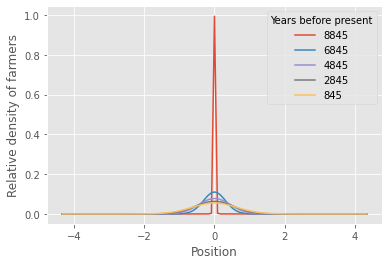

In [12]:
# Migration coefficient
var = (25/1000)**2   # per 1000 km
gen = 25/1000        # per 1000 years 
M   = var/gen
print(M)

import matplotlib.pyplot as plt
plt.style.use("ggplot")
for n in range(0, Nt):
    for i in range(0, Nx):
        p[n+1, i] = p[n, i] + diffusion(i, n, p, dx, M)*dt
        
    # Insert boundary conditions
    p[n+1, 0] = 0;  p[n+1, Nx] = 0

    # Plotting every 2000th time step.
    if n%2000==0:
        plt.plot(x, p[n+1], label=f"{1000*t[n]:.0f}")
  
plt.legend(title="Years before present", loc="best", fancybox=True)
plt.xlabel("Position")
plt.ylabel("Relative density of farmers")
plt.show()

### Diffusion and growth

In the simulation above we have used the constraint that the population of migrating farmers did not spread their knowledge of farming to individuals that they met on their way to Europe. Instead, we have assumed that the same farmers that moved from Jericho continued farming other places. However, in reality, we have good reasons to believe that the knowledge of farming also has spread to other groups of people. We must therefore add to our simulations above the information that the moving farmers may have spread their knowledge of farming through interactions with other people. 

This spread of knowledge may be assumed to take the same form as the spread of a rumor through a population. Hence, we do not only expect the population to have moved to the east and to the west of Jericho, as simulated above, but we further assume that the change in the relative density of people also includes a term of the form 

\\[ 
\alpha p(t,x)(1 - p(t,x)),
\\]

where $\alpha$ governs the rate of growth of the relative density of people who have adopted the innovation, referred to as the adoption rate. 

To include this growth in our simulation, we must add the logistic growth-equation above to the line where we find the density of people, $p$, in the code above. Below we define a function called `logistic_growth` which governs the growth of the density of people who have adopted the innovation.

In [13]:
def logistic_growth(i, n, p, dx, alpha):
    return alpha*p[n, i]*(1 - p[n, i])

In the article by Ammerman and Cavalli-Sforza multiple diffusion rates are found. The rate of diffusion is the speed with which the information is spread between individuals, and is denoted by $\nu$ (pronounced *nu*). Taking the mean of the presented rates (excluding the Balkans and Bandkermaik), we find that $\nu = 1.56$ km/year. This speed is related to the migration coefficient, $M$, and the adoption rate, $\alpha$, through 

\\[
\nu = \sqrt{2\alpha M}.
\\]

Thus the change in the relative density of people adopting the innovation of early farming is given by 

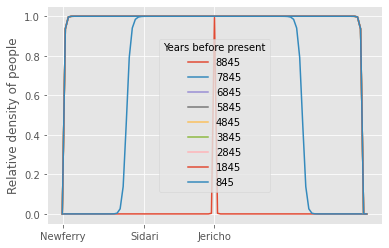

In [14]:
nu = 1.56            # Rate of diffusion
alpha = 0.5*nu**2/M  # Rate of adoption

import matplotlib.pyplot as plt
plt.style.use("ggplot")
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        p[n+1, i] = p[n, i] + diffusion(i, n, p, dx, M)*dt + logistic_growth(i, n, p, dx, alpha)*dt
        
    # Insert boundary conditions
    p[n+1, 0] = 0;  p[n+1, Nx] = 0

    # Plotting every 1000th time step
    if n%1000==0: 
        plt.plot(x, p[n+1], label=f"{1000*t[n]:.0f}")
        
plt.legend(title="Years before present", loc="best", fancybox=True)        
"""Cities:"""
plt.xticks([0, -1.999, -4.311], ["Jericho", "Sidari", "Newferry"])
plt.ylabel("Relative density of people")
plt.show()

---

### In-class exercises:

1. Describe the figure above showing the spread of agriculture through diffusion and interaction with other people. Does the evolution look like expected? Why/why not?
2. Play around with different migration constants $M$ and growth rates $\alpha$. Are there any limitations to what these can be?

---